   ### Supervised Learning - Campaign for selling personal loans

##### Aim - To build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### Overview:

1.	Read the column description and ensure you understand each attribute well
2.	Study the data distribution in each attribute, share your findings. (5 points)
3.	Get the target column distribution. Your comments
4.	Split the data into training and test set in the ratio of 70:30 respectively
5.	Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6.	Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

## Dataset 

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Column description:

1) ID	- Customer ID

2) Age	- Customer's age in completed years

3) Experience	- #years of professional experience

4) Income	- Annual income of the customer ($000)

5) ZIPCode	- Home Address ZIP code.

6) Family	- Family size of the customer

7) CCAvg	- Avg. spending on credit cards per month ($000)

8) Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

9) Mortgage	Value of house mortgage if any. ($000)

10) Personal Loan - Did this customer accept the personal loan offered in the last campaign?

11) Securities Account	Does the customer have a securities account with the bank?

12) CD Account	Does the customer have a certificate of deposit (CD) account with the bank?

13) Online	Does the customer use internet banking facilities?

14) CreditCard	Does the customer use a credit card issued by UniversalBank?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn  as  sns

In [2]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling_1.csv")
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
#to avoid technical issues spaces in the column names are replaced with _
bank_df.columns = bank_df.columns.str.replace(' ', '_')

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Question 2
## Exploring the Data

#### Answer:

In [5]:
bank_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bank_df.tail()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
bank_df.sample(5)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4402,4403,55,25,52,90095,1,1.40,3,207,0,1,0,0,0
1030,1031,61,35,112,90024,4,1.70,3,0,0,0,0,0,1
973,974,43,18,85,92703,1,4.00,3,287,0,0,0,1,0
1466,1467,33,9,145,94303,2,4.33,1,277,0,0,0,0,1
1890,1891,52,27,184,90630,1,8.10,1,0,0,0,0,0,0


In [8]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
bank_df['Securities_Account'].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [10]:
bank_df['CD_Account'].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [11]:
bank_df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [12]:
bank_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

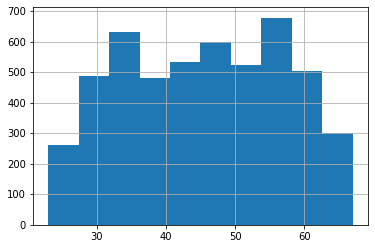

In [13]:
bank_df['Age'].hist()

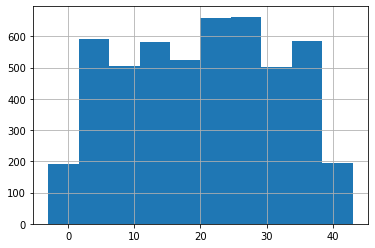

In [14]:
bank_df['Experience'].hist()

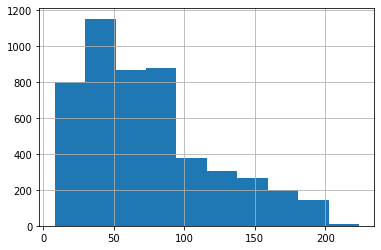

In [15]:
bank_df['Income'].hist()

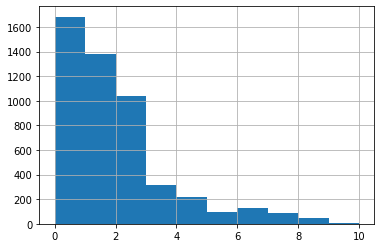

In [16]:
bank_df['CCAvg'].hist()

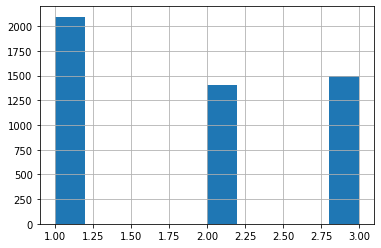

In [17]:
bank_df['Education'].hist()

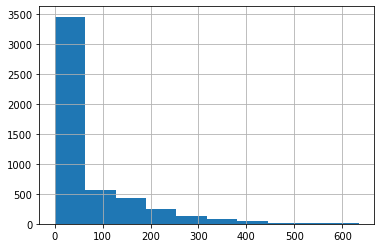

In [18]:
bank_df['Mortgage'].hist()

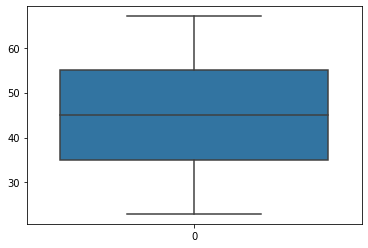

In [19]:
sns.boxplot(data=bank_df.Age)

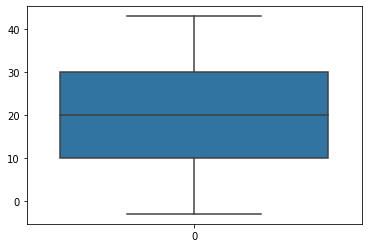

In [20]:
sns.boxplot(data=bank_df.Experience)

As all the records for the customers who opted for Personal loan during the previous campaign are having outliers, it is not good to remove the outliers

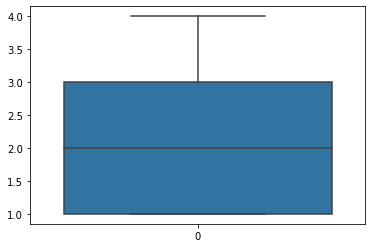

In [21]:
sns.boxplot(data=bank_df.Family)

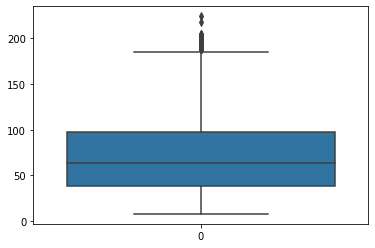

In [22]:
sns.boxplot(data=bank_df.Income)

In [23]:
# Detect Outliers for income column
Q1_inc=bank_df['Income'].quantile(0.25)
Q3_inc=bank_df['Income'].quantile(0.75)
IQR_inc=Q3_inc-Q1_inc
print("IQR_Income:")
print(IQR_inc,"\n")

print("Outlier details:\n")
print(bank_df[bank_df['Income']<(Q1_inc-1.5*IQR_inc)].dropna(how='all')['Personal_Loan'].value_counts(),"\n")
print(bank_df[bank_df['Income']>(Q3_inc+1.5*IQR_inc)].dropna(how='all')['Personal_Loan'].value_counts(),"\n")

IQR_Income:
59.0 

Outlier details:

Series([], Name: Personal_Loan, dtype: int64) 

0    54
1    42
Name: Personal_Loan, dtype: int64 



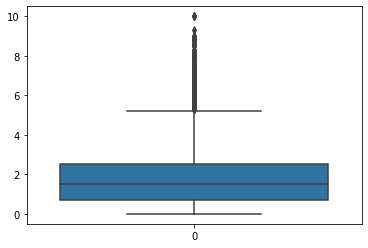

In [24]:
sns.boxplot(data=bank_df.CCAvg)

In [25]:
# Detect Outliers for income column
Q1_CCAvg=bank_df['CCAvg'].quantile(0.25)
Q3_CCAvg=bank_df['CCAvg'].quantile(0.75)
IQR_CCAvg=Q3_CCAvg-Q1_CCAvg
print("IQR_CCAvg:")
print(IQR_CCAvg,"\n")

print("Outlier details:\n")
print(bank_df[bank_df['CCAvg']<(Q1_CCAvg-1.5*IQR_CCAvg)].dropna(how='all')['Personal_Loan'].value_counts(),"\n")
print(bank_df[bank_df['CCAvg']>(Q3_CCAvg+1.5*IQR_CCAvg)].dropna(how='all')['Personal_Loan'].value_counts(),"\n")

IQR_CCAvg:
1.8 

Outlier details:

Series([], Name: Personal_Loan, dtype: int64) 

0    199
1    125
Name: Personal_Loan, dtype: int64 



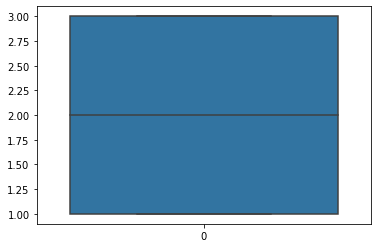

In [26]:
sns.boxplot(data=bank_df.Education)

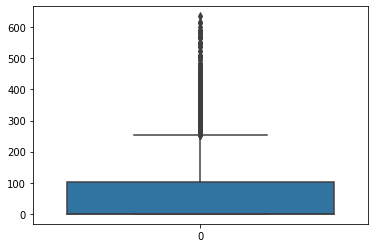

In [27]:
sns.boxplot(data=bank_df.Mortgage)

In [28]:
# Detect Outliers for income column
Q1_Mort=bank_df['Mortgage'].quantile(0.25)
Q3_Mort=bank_df['Mortgage'].quantile(0.75)
IQR_Mort=Q3_Mort-Q1_Mort
print("IQR_Mort:")
print(IQR_Mort,"\n")

print("Outlier details:\n")
print(bank_df[bank_df['Mortgage']<(Q1_Mort-1.5*IQR_Mort)].dropna(how='all')['Personal_Loan'].value_counts(),"\n")
print(bank_df[bank_df['Mortgage']>(Q3_Mort+1.5*IQR_Mort)].dropna(how='all')['Personal_Loan'].value_counts(),"\n")

IQR_Mort:
101.0 

Outlier details:

Series([], Name: Personal_Loan, dtype: int64) 

0    198
1     93
Name: Personal_Loan, dtype: int64 



In [29]:
bank_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [30]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no null / missing values in any of the columns

In [31]:
print("Variance of all numeric columns: ")
print(bank_df.var(),"\n")

Variance of all numeric columns: 
ID                    2.083750e+06
Age                   1.314042e+02
Experience            1.315140e+02
Income                2.119104e+03
ZIP_Code              4.502257e+06
Family                1.317130e+00
CCAvg                 3.054312e+00
Education             7.053801e-01
Mortgage              1.034570e+04
Personal_Loan         8.680136e-02
Securities_Account    9.351934e-02
CD_Account            5.676319e-02
Online                2.406779e-01
CreditCard            2.076055e-01
dtype: float64 



In [32]:
#Lets remove the ID column as it is not required for our analysis
bank_df.drop(['ID'], axis=1,inplace=True)

In [33]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


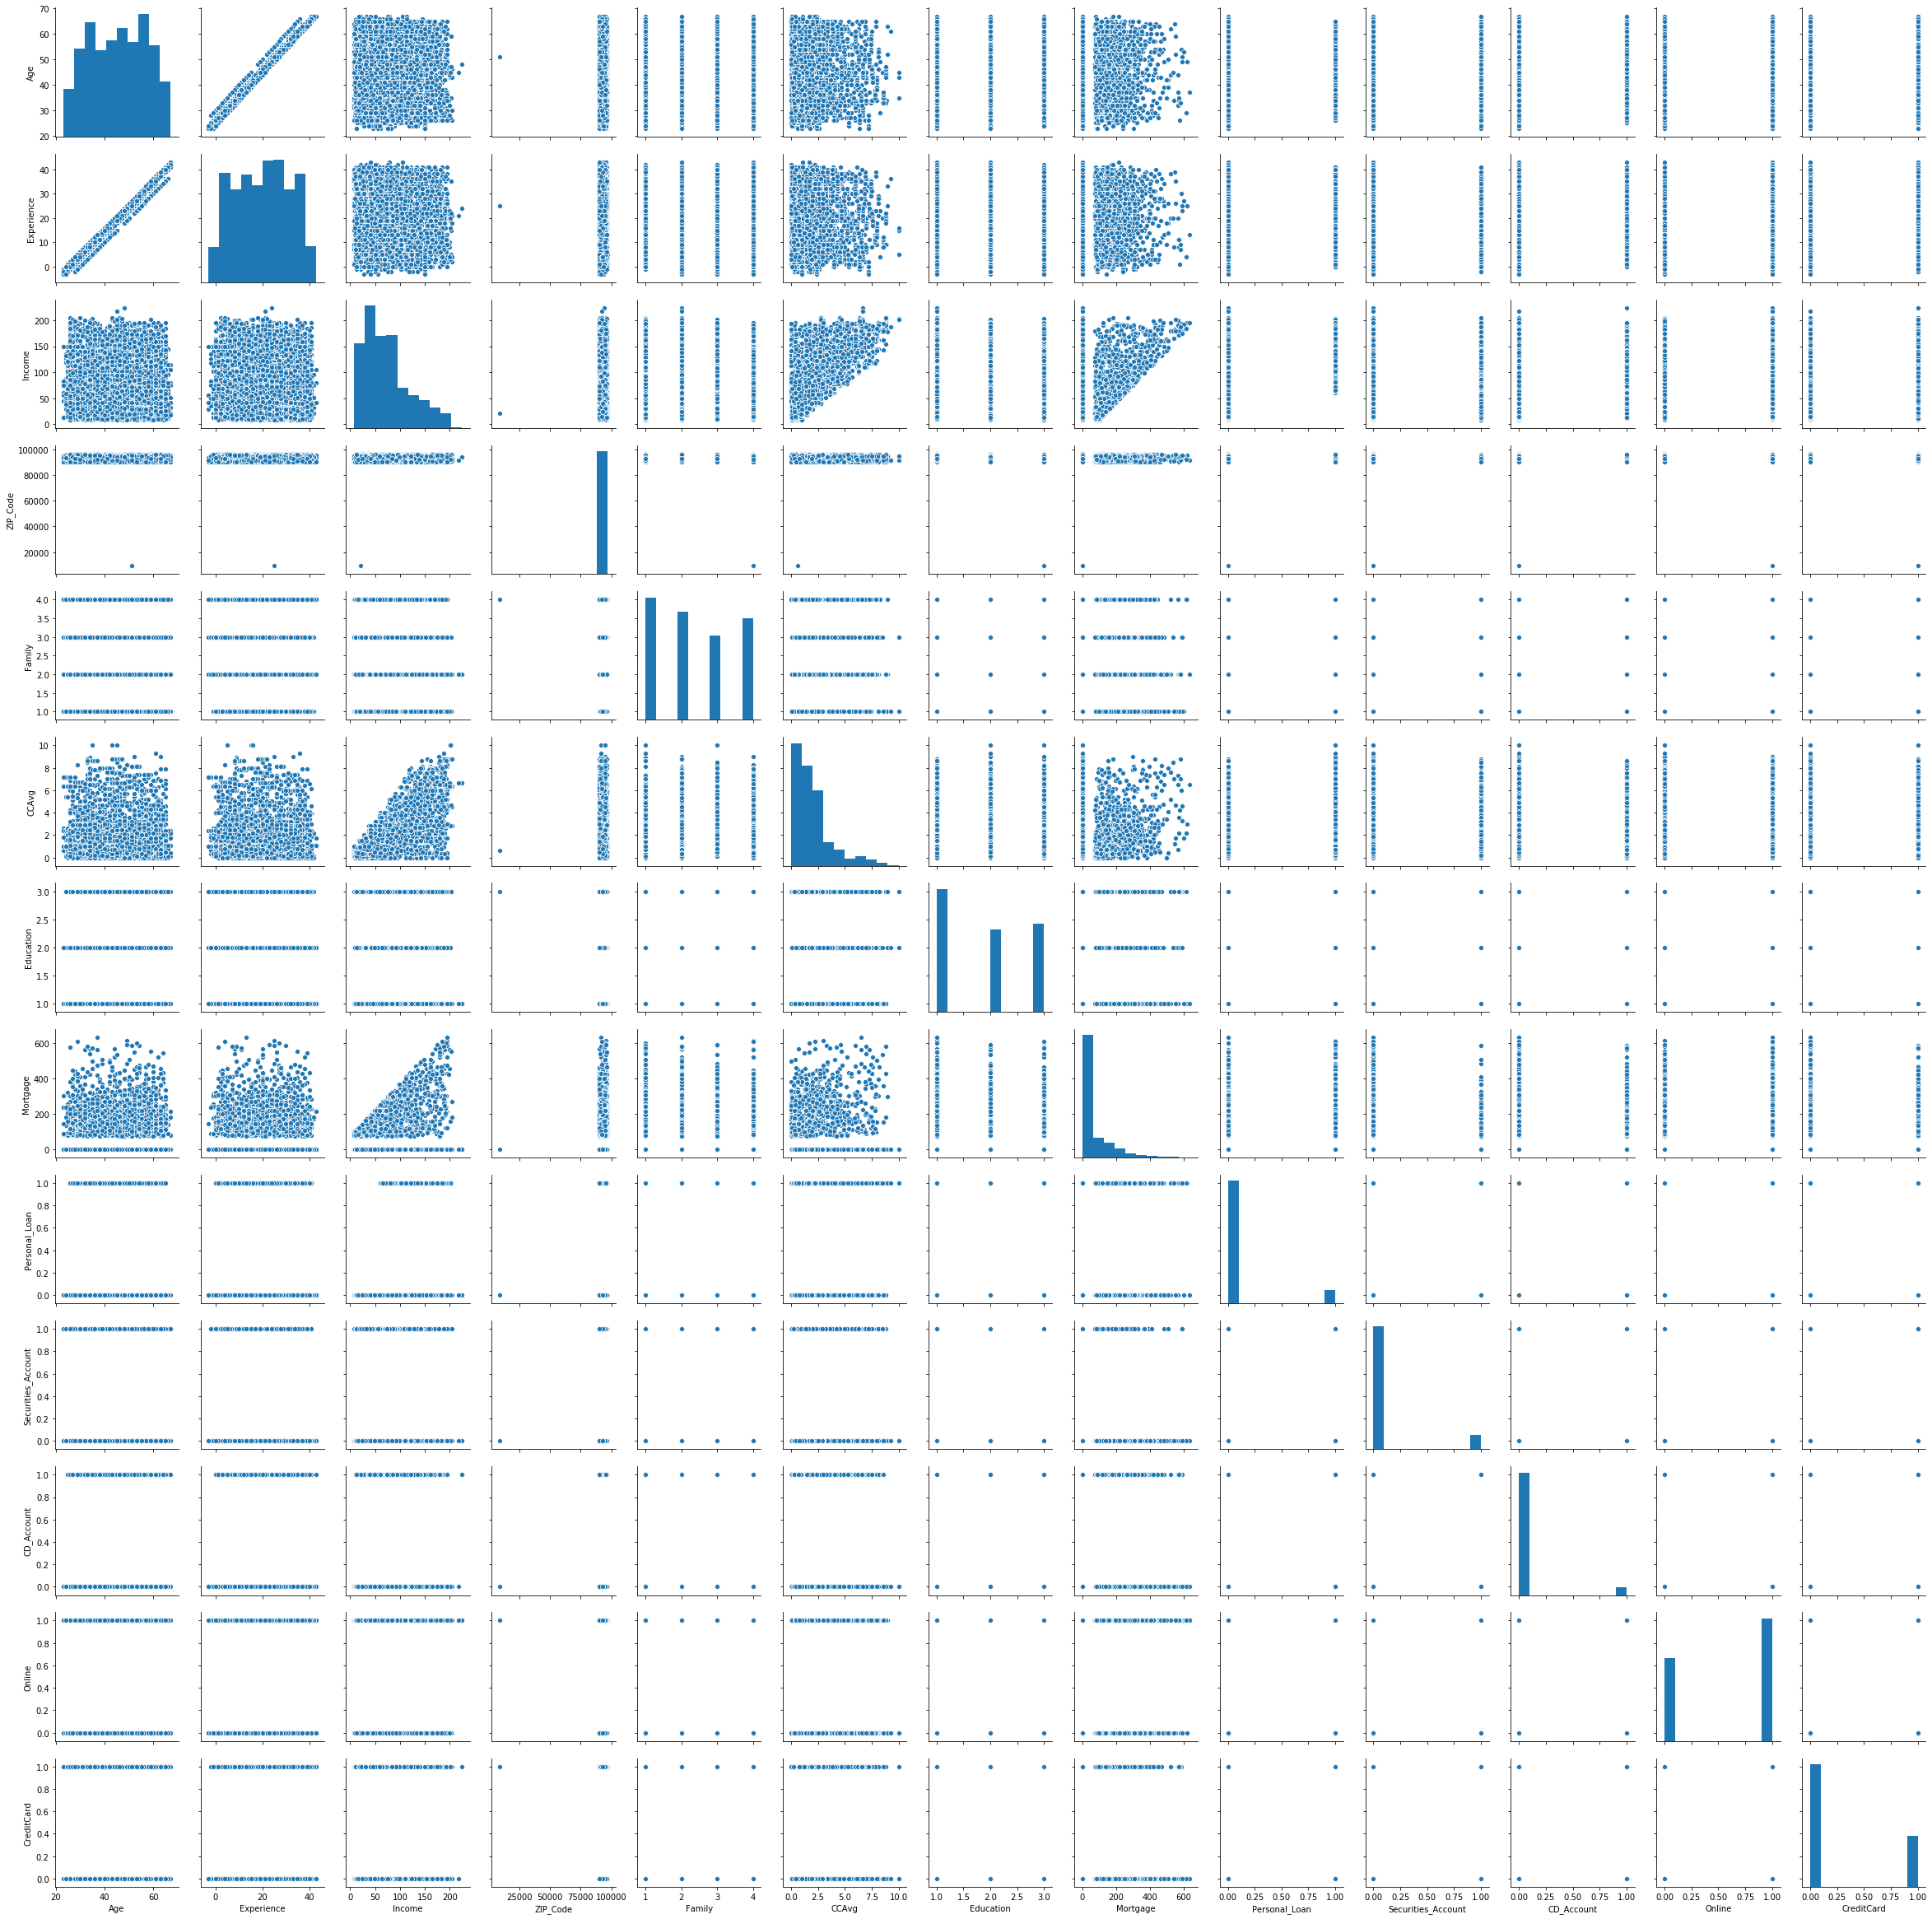

In [34]:
sns.pairplot(bank_df)

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


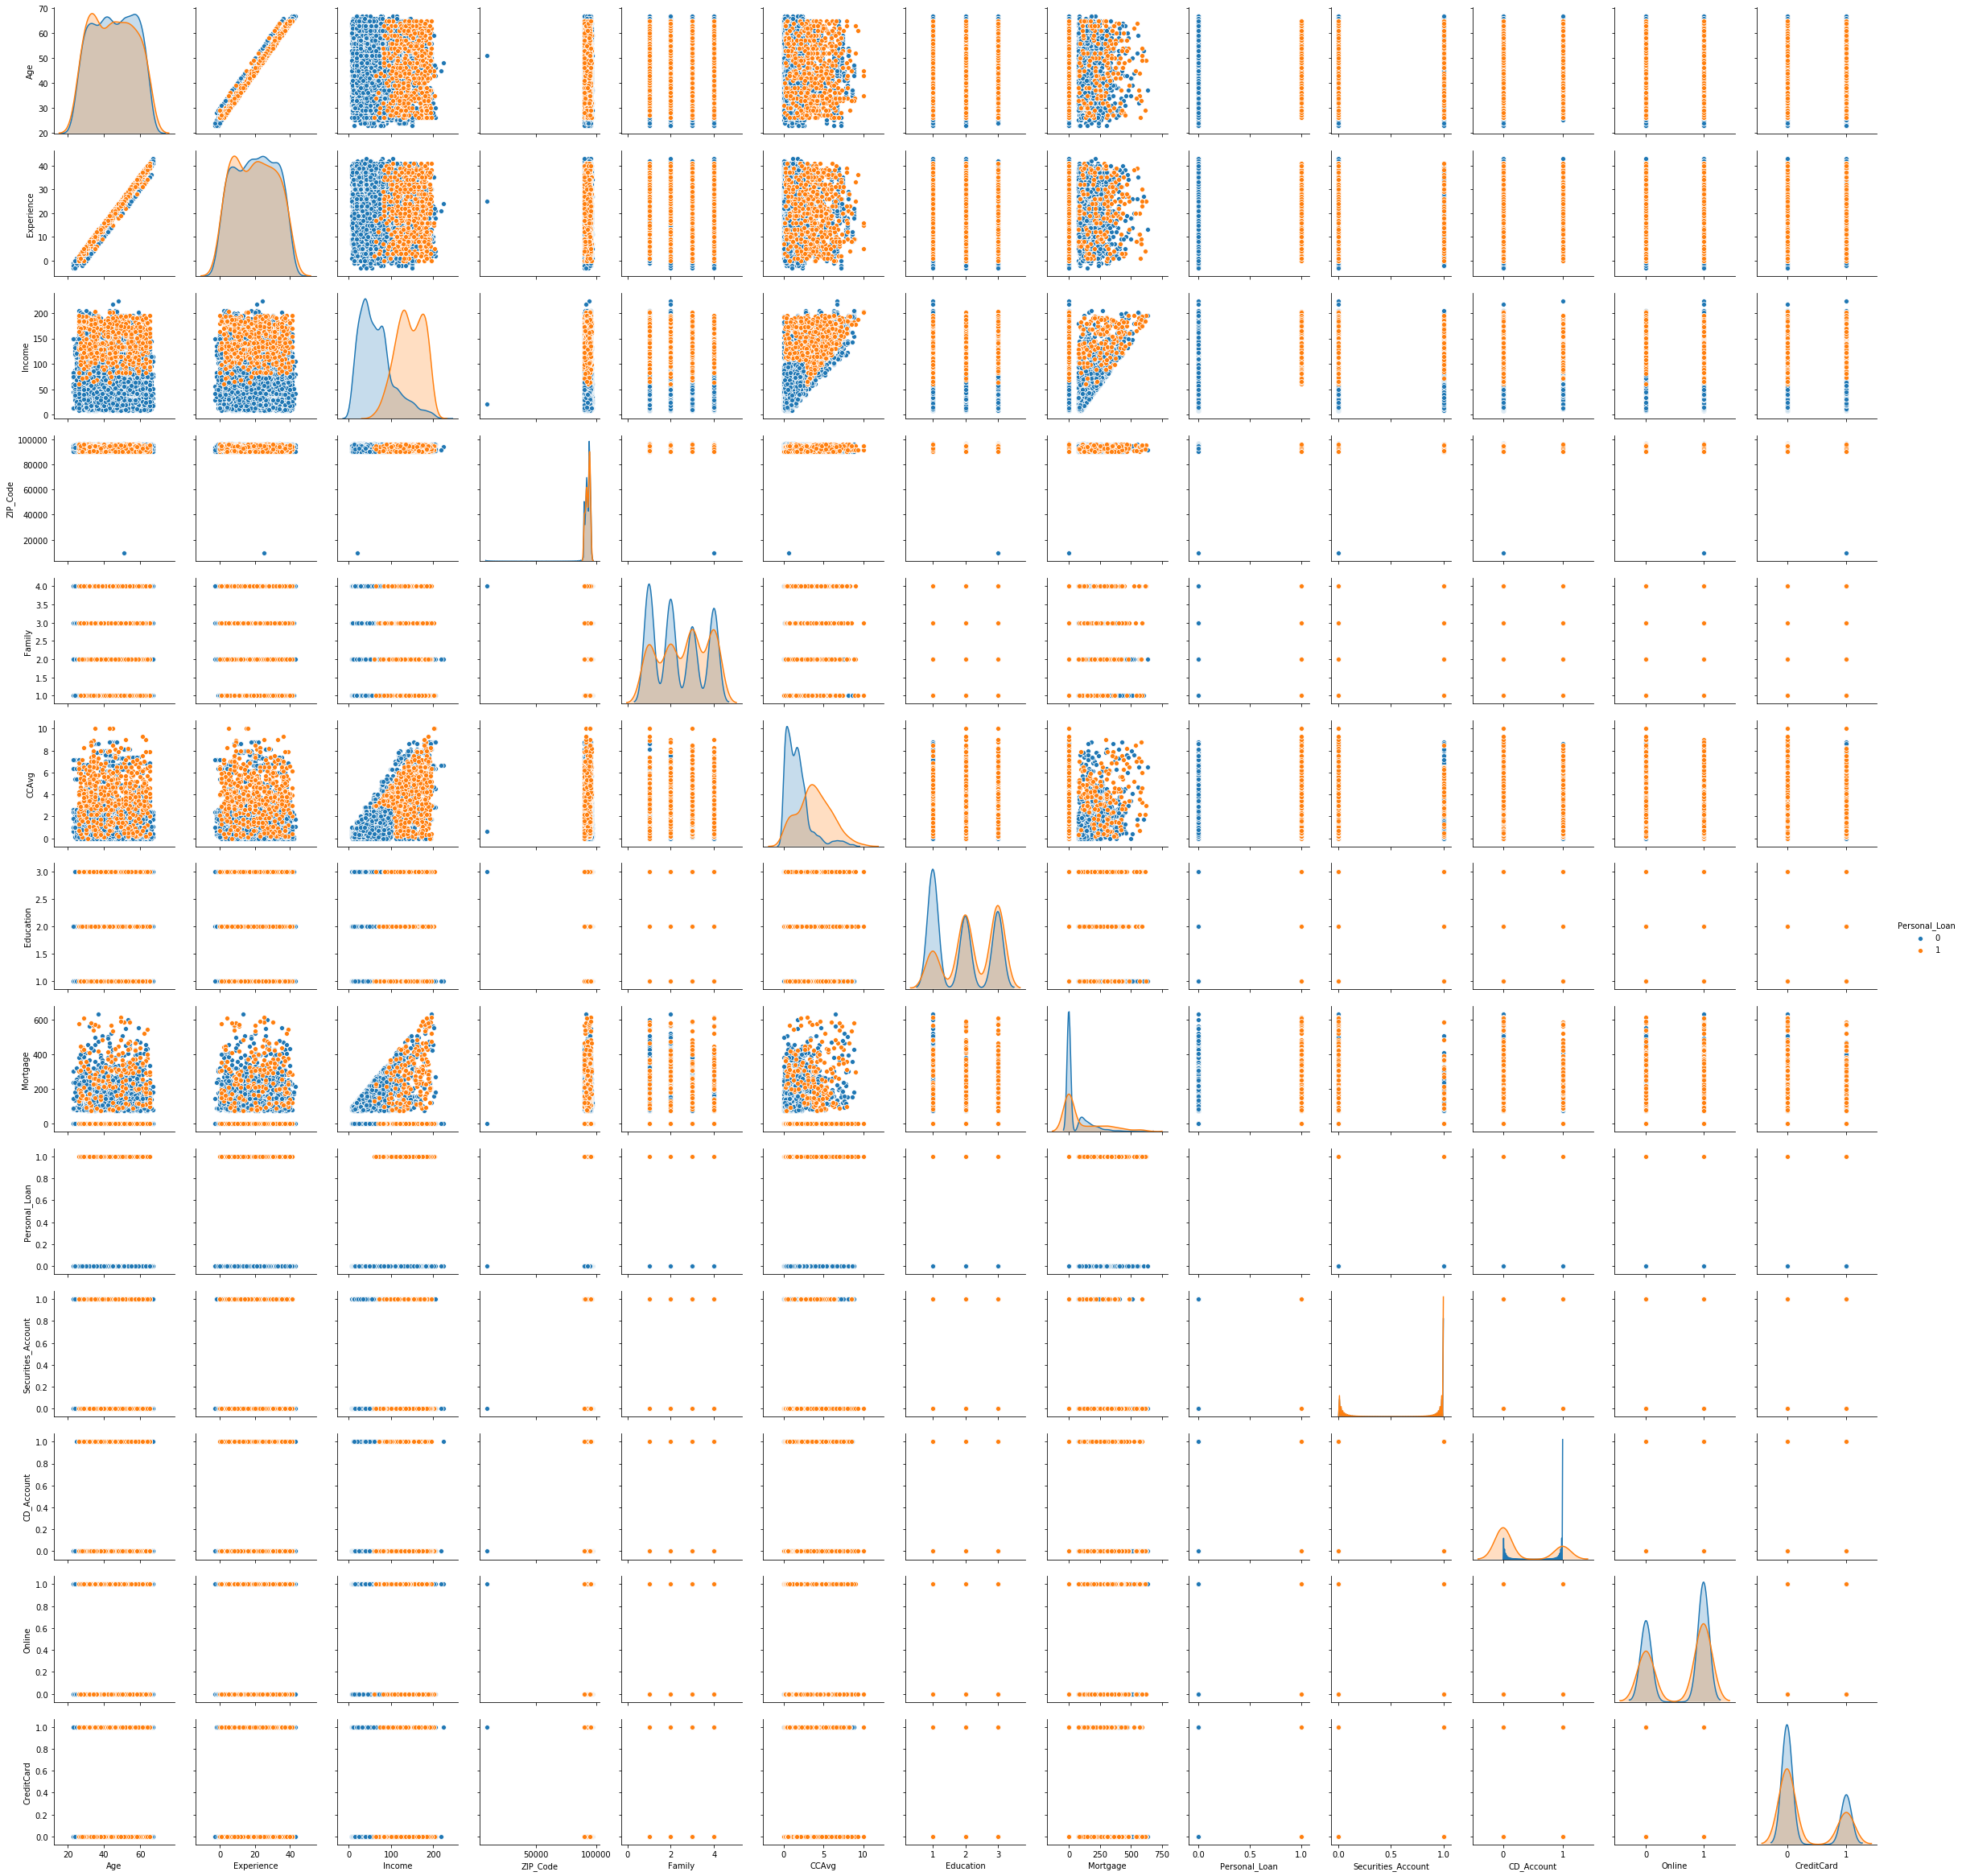

In [35]:
sns.pairplot(bank_df,hue='Personal_Loan')

In [36]:
#Checking the correlation of individual columns with Personal loan
bank_df.corr()['Personal_Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP_Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

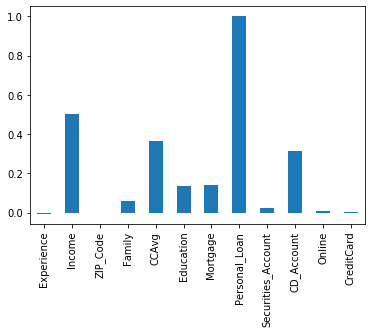

In [37]:
#Plotting the correlations to visualise
bank_df.corr()['Personal_Loan'][1:].plot.bar()

## Insights

#### Target Variable
*Personal Loan column is my target column as it tells us whether or not a customer opted for Personal Loan as part of last years campaign, which means we have data for training & test the model we are going to build*

#### Independent variables and feature selection

1) Age is normally distributed with majority of the customers between 30 to 60 years of age. Mean and medium are more or less same

2) Experience column is also normally distributed

3) Experience column has negative values which is not possible in reality. This might be some erroneous data

4) Age and Experience are strongly positively correlated and hence one of the columns can be dropped for our model buidling. Age column is clean but since Experience column has the problematic records(with exp < 0), better we drop Experience column

5) Income data is positively skewed. Mean > Median. 

6) Zip Code is a categorical variable. It has less correlation with our target column

7) Securities Account, Online and Credit Card are binary columns. These columns have less correlation with the target

8) Almost 70% of the customers do not have Mortgage

9) Family and Education are ordinal columns

10) Family is sort of evenly distributed

11) Though there are outliers in the mortgage, income and Credit card spending average columns, there are cases of availing personal loans in the past for these outlier records as well. Removing the outliers here will cause lose of good training data so the outliers are not treated here

12) Income, CCAvg, CD Account and Education columns have very good correlation with availing personal Loan. Family and Mortgage columns also have some amount of correlation with the target column personal loan. So we shall consider them as our features. As other columns doesnt seem to be of much interest based on the correlation with personal loan we ignore them

In [38]:
X=bank_df[['Income','CCAvg','CD_Account','Family','Mortgage','Education']]
y=bank_df['Personal_Loan']
print(X.shape)
print(y.shape)

(5000, 6)
(5000,)


#### Training and testing data split

In [39]:
#Scaling X before train test split
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
print(X_scaled)

[[0.18981481 0.16       0.         1.         0.         0.        ]
 [0.12037037 0.15       0.         0.66666667 0.         0.        ]
 [0.01388889 0.1        0.         0.         0.         0.        ]
 ...
 [0.07407407 0.03       0.         0.33333333 0.         1.        ]
 [0.18981481 0.05       0.         0.66666667 0.         0.5       ]
 [0.34722222 0.08       0.         0.66666667 0.         0.        ]]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state = 0)
print(X_test.shape)

(1500, 6)


In [41]:
y_train_df=pd.DataFrame(y_train)

In [42]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 2858 to 2732
Data columns (total 1 columns):
Personal_Loan    3500 non-null int64
dtypes: int64(1)
memory usage: 54.7 KB


In [43]:
y_train_df['Personal_Loan'].value_counts()

0    3148
1     352
Name: Personal_Loan, dtype: int64

Roughly good number of 0s and 1s in the training dataset. There is no class imbalance

#### Model Implementation

# K Nearest Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [45]:
# Finding the best k value
error_rate = [] 
for k in range(1,70,2): 
    print("For K = ",k,":")
    knn=KNeighborsClassifier(n_neighbors=k,p=1,weights='uniform')
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    print("knn score for testing : ", knn.score(X_test,y_test))
    error_rate.append(np.mean(y_test_pred !=y_test))

For K =  1 :
knn score for testing :  0.9833333333333333
For K =  3 :
knn score for testing :  0.98
For K =  5 :
knn score for testing :  0.976
For K =  7 :
knn score for testing :  0.9733333333333334
For K =  9 :
knn score for testing :  0.9726666666666667
For K =  11 :
knn score for testing :  0.9706666666666667
For K =  13 :
knn score for testing :  0.9693333333333334
For K =  15 :
knn score for testing :  0.9686666666666667
For K =  17 :
knn score for testing :  0.9686666666666667
For K =  19 :
knn score for testing :  0.9673333333333334
For K =  21 :
knn score for testing :  0.966
For K =  23 :
knn score for testing :  0.9646666666666667
For K =  25 :
knn score for testing :  0.9646666666666667
For K =  27 :
knn score for testing :  0.9633333333333334
For K =  29 :
knn score for testing :  0.9593333333333334
For K =  31 :
knn score for testing :  0.9586666666666667
For K =  33 :
knn score for testing :  0.9593333333333334
For K =  35 :
knn score for testing :  0.9566666666666667
F

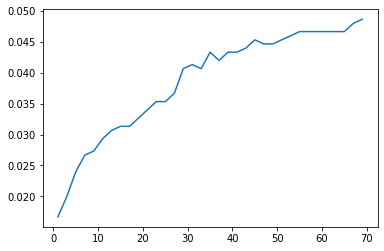

In [46]:
plt.plot(range(1,70,2),error_rate)
plt.show()

K value of 1 looks optimal for the given model with 98.3% accuracy in predicting customer availing personal loan after the campaign

#### Confusion Matrix for KNN at the best K value

In [47]:
knn=KNeighborsClassifier(n_neighbors=1,p=1,weights='uniform')
knn.fit(X_train, y_train)
y_pred_optimal_k=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_optimal_k)
print(confusion_matrix)

[[1359   13]
 [  12  116]]


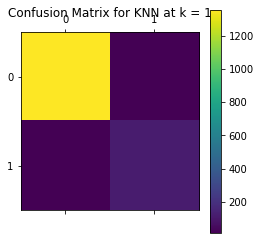

In [48]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for KNN at k = 1")
plt.colorbar()
plt.show()

In [49]:
from sklearn import model_selection

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [51]:
model=LogisticRegression()

In [52]:
model.fit(X_train, y_train)

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction=model.predict(X_test)

In [54]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9506666666666667

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test,prediction)

0.6542056074766355

Model is 95.06% accurate in predicting whether the customer will avail personal loan or not after the upcoming campaign

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1356   16]
 [  58   70]]


74 incorrect predictions by the model

16 false positives and 58 false negatives

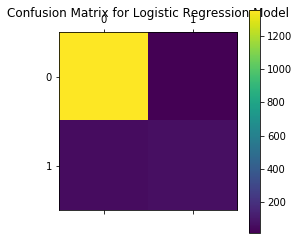

In [58]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for Logistic Regression Model")
plt.colorbar()
plt.show()

# Naive bayes with Iris data

### Train and Fit NaiveBayes Model

In [59]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [60]:
y_pred_GNB=clf_GNB.predict(X_test)

In [61]:
print(X_test)
print(y_test)
print(y_pred_GNB)

[[0.06944444 0.04       0.         0.33333333 0.         0.        ]
 [0.34722222 0.01       0.         0.         0.         0.        ]
 [0.2962963  0.14       0.         0.66666667 0.34330709 1.        ]
 ...
 [0.52777778 0.         0.         0.         0.         0.        ]
 [0.21759259 0.167      0.         0.33333333 0.         0.5       ]
 [0.20833333 0.14       0.         0.         0.         0.        ]]
398     0
3833    0
4836    0
4572    0
636     0
       ..
4554    0
4807    0
1073    0
2906    0
1357    0
Name: Personal_Loan, Length: 1500, dtype: int64
[0 0 0 ... 0 0 0]


In [62]:
# Accuracy score for Naive Bayes 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.888

The Model is 88.8% accurate in predicting whether the customer will avail personal loan or not based on given conditions

In [63]:
# Confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[1256  116]
 [  52   76]]


There are 168 incorrect predictions out of which 116 are false positive and 52 are false negatives

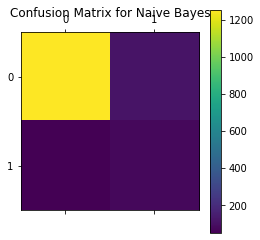

In [64]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for Naive Bayes")
plt.colorbar()
plt.show()

 ### Conclusion: 
 #### From  the above we see that KNN  provides better model in predicting the personal loan availment  of  customers  after campaign as
 ##### 1) It gives the highest accuracy score of 98.33% at k = 1
 ##### 2) Number of false positives and false negatives are both minimal when compared to Logistic Regression and Naive Bayes
 